**Import** **modules**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Loading** **the** **Dataset**

In [3]:
df= pd.read_csv("/content/drive/MyDrive/iris.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Preprocessing the datset**

In [8]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

**Exploratory data analysis**

<Axes: >

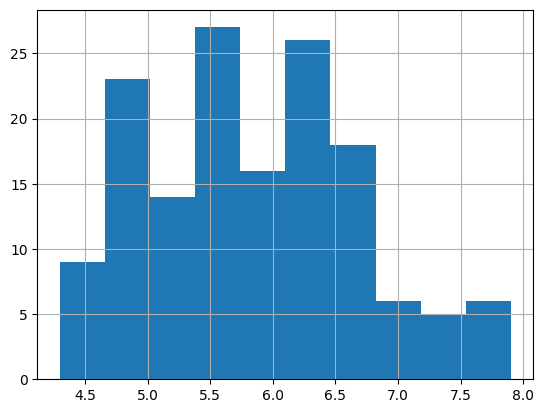

In [9]:
df['Sepal.Length'].hist()

<Axes: >

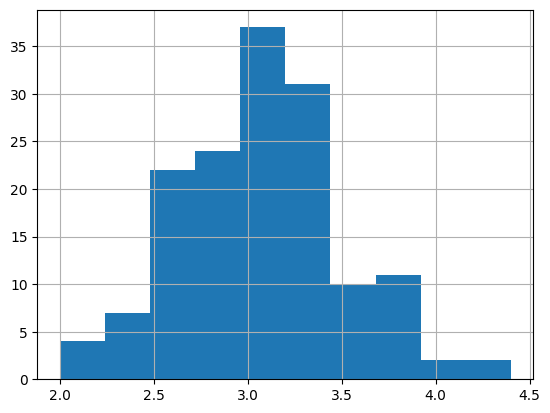

In [10]:
df['Sepal.Width'].hist()

<Axes: >

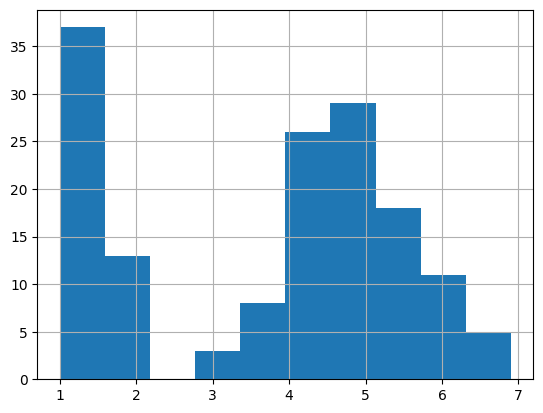

In [11]:
df['Petal.Length'].hist()

<Axes: >

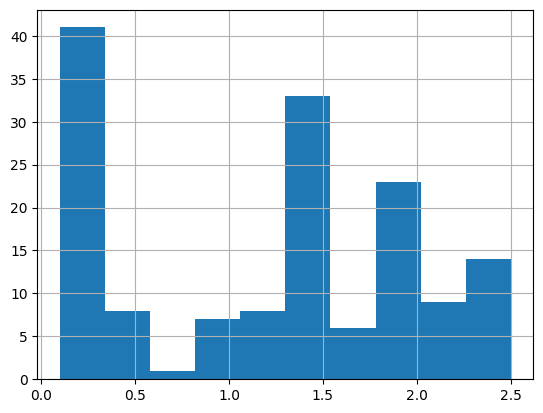

In [12]:
df['Petal.Width'].hist()

In [13]:
colors=['red','orange','blue']
species=['setosa', 'versicolor' , 'virginica']

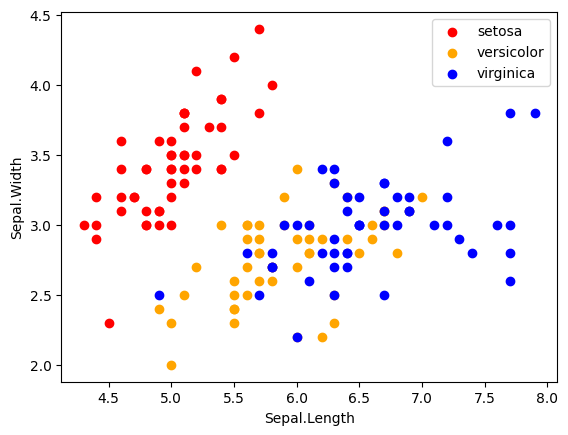

In [14]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['Sepal.Length'],x['Sepal.Width'],c=colors[i],label=species[i])
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.legend()

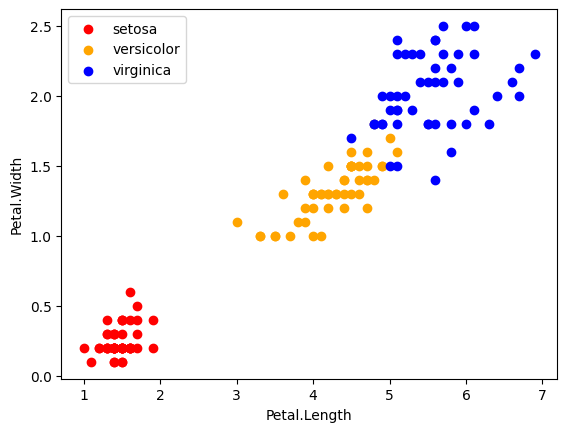

In [15]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['Petal.Length'],x['Petal.Width'],c=colors[i],label=species[i])
plt.xlabel("Petal.Length")
plt.ylabel("Petal.Width")
plt.legend()

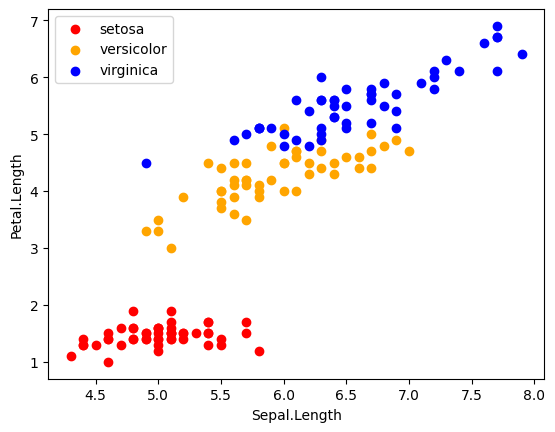

In [16]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['Sepal.Length'],x['Petal.Length'],c=colors[i],label=species[i])
plt.xlabel("Sepal.Length")
plt.ylabel("Petal.Length")
plt.legend()

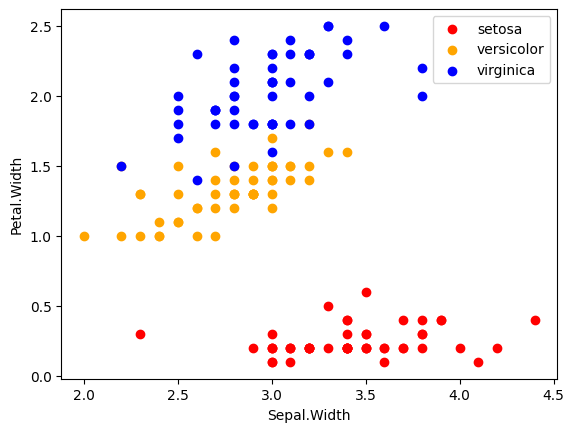

In [17]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['Sepal.Width'],x['Petal.Width'],c=colors[i],label=species[i])
plt.xlabel("Sepal.Width")
plt.ylabel("Petal.Width")
plt.legend()

**Correlation matrix**

In [18]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
df_numeric.corr()  # Calculate correlations on numeric columns only

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

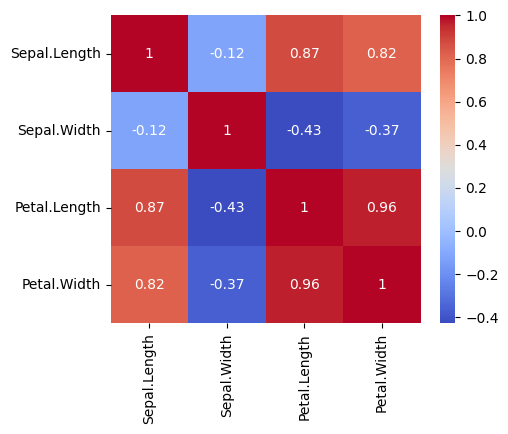

In [19]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlations on numeric columns only
corr = df_numeric.corr()

# Proceed with creating the heatmap
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

**Label Encoder**

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model training**

In [21]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#print metric to get performance
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 97.77777777777777


In [25]:
#knn - k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
# print metric to get performance
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 95.55555555555556


In [28]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
#print metric to get performance
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 93.33333333333333
